In [ ]:
from infrastructure.classes import Experiment, TrainParameters
from pushforward_operators import FastNonLinearQuantileRegression
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="fnlvqr_banana",
    dataset_number_of_points=20000,
    dataloader_parameters=dict(batch_size=512, shuffle=True),
    pushforward_operator_name="fast_non_linear_vector_quantile_regression",
    pushforward_operator_parameters=dict(
        fnlvqr_mlp_arguments=dict(
            verbose=True,
            num_epochs=1,
            epsilon=5e-3,
            lr=0.4,
            gpu=True,
            skip=False,
            batchnorm=False,
            hidden_layers=(2, 10, 20),
            batchsize_y=None,
            batchsize_u=None,
            inference_batch_size=100,
            lr_factor=0.9,
            lr_patience=300,
            lr_threshold=0.5 * 0.01,
        ),
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=32,
        number_of_hidden_layers=4,
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=0,
        verbose=True,
        optimizer_parameters=dict(lr=0.1),
        scheduler_parameters=dict(eta_min=0)
    )
)

# model = train(experiment)
model = FastNonLinearQuantileRegression.load_class("../../experiments_full_13_09_2025_fnlvqr/fnlvqr_banana/fast_non_linear_vector_quantile_regression/weights.pth")
model.to(**experiment.tensor_parameters)
_ = model.eval()

In [39]:
from pushforward_operators import FastNonLinearQuantileRegression
model = FastNonLinearQuantileRegression.load_class("../../experiments_full_16_09_2025/fnlvqr_banana/fast_non_linear_vector_quantile_regression/weights.pth")

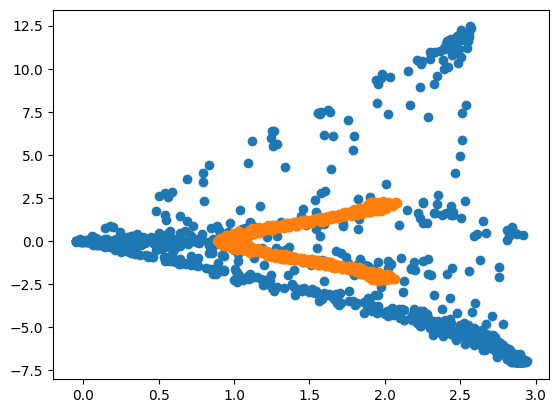

In [57]:
import matplotlib.pyplot as plt
import torch
from datasets import FNLVQR_Banana

tensor_parameters = {}
model
dataset = FNLVQR_Banana(tensor_parameters)
U = torch.randn(1000, 2).to(**tensor_parameters)
X = dataset.sample_covariates(1).repeat(1000, 1).to(**tensor_parameters)
model.to(X)
_, Y_gt = dataset.sample_conditional(X)
Y = model.push_u_given_x(U, X)
plt.scatter(Y[:, 0], Y[:, 1])
plt.scatter(Y_gt[:, 0], Y_gt[:, 1])
plt.show()
